In [2]:
from DataManager import CALFData, collateGCN
import numpy as np
import torch 
from Model import ContextAwareModel
from helpers.loss import ContextAwareLoss, SpottingLoss
from train import trainer
import pickle
from dataclasses import dataclass
import matplotlib.pyplot as plt
from Visualiser import collateVisGCN, Visualiser

# Model 1 - First try

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=100
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.005
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 18

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=18, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Get labels & features: 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]
Train 1: Time 7.546s (it:7.233s) Data:0.605s (it:0.544s) Loss 6.5064e+03 Loss Seg 4.8473e+04 Loss Spot 6.2641e+03 : 100%|███████| 57/57 [07:10<00:00,  7.55s/it]
Evaluate 1: Time 5.233s (it:5.061s) Data:0.546s (it:0.493s) Loss 6.2995e+03 Loss Seg 5.7678e+04 Loss Spot 6.0111e+03 : 100%|████| 57/57 [04:58<00:00,  5.23s/it]
Train 2: Time 7.031s (it:6.558s) Data:0.591s (it:0.530s) Loss 6.2373e+03 Loss Seg 4.4035e+04 Loss Spot 6.0171e+03 : 100%|███████| 57/57 [06:40<00:00,  7.03s/it]
Evaluate 2: Time 4.860s (it:4.886s) Data:0.529s (it:0.488s) Loss 6.2723e+03 Loss Seg 5.5650e+04 Loss Spot 5.9941e+03 : 100%|████| 57/57 [04:37<00:00,  4.86s/it]
Train 3: Time 6.554s (it:7.175s) Data:0.584s (it:1.009s) Loss 6.2204e+03 Loss Seg 4.1671e+04 Loss Spot 6.0121e+03 : 100%|███████| 57/57 [06:13<00:00,  6.55s/it]
Evaluate 3: Time 4.690s (it:5.015s) Data:0.530s (it:0.797s) Loss 6.2264e+03 Loss Seg 4.7163e+04 Loss Spot 5.9906e+03 : 100%|██

Epoch 00058: reducing learning rate of group 0 to 1.0000e-04.


Train 59: Time 6.731s (it:6.509s) Data:0.582s (it:0.526s) Loss 6.0515e+03 Loss Seg 1.7048e+04 Loss Spot 5.9662e+03 : 100%|██████| 57/57 [06:23<00:00,  6.73s/it]
Evaluate 59: Time 4.676s (it:4.642s) Data:0.530s (it:0.486s) Loss 6.1062e+03 Loss Seg 1.8442e+04 Loss Spot 6.0140e+03 : 100%|███| 57/57 [04:26<00:00,  4.68s/it]
Train 60: Time 6.749s (it:6.449s) Data:0.584s (it:0.531s) Loss 6.0131e+03 Loss Seg 1.6862e+04 Loss Spot 5.9288e+03 : 100%|██████| 57/57 [06:24<00:00,  6.75s/it]
Evaluate 60: Time 4.685s (it:4.632s) Data:0.531s (it:0.491s) Loss 6.1008e+03 Loss Seg 1.7381e+04 Loss Spot 6.0139e+03 : 100%|███| 57/57 [04:27<00:00,  4.69s/it]
Train 61: Time 6.808s (it:6.804s) Data:0.585s (it:0.530s) Loss 6.0234e+03 Loss Seg 1.6877e+04 Loss Spot 5.9390e+03 : 100%|██████| 57/57 [06:28<00:00,  6.81s/it]
Evaluate 61: Time 4.523s (it:4.484s) Data:0.529s (it:0.488s) Loss 6.1018e+03 Loss Seg 1.7559e+04 Loss Spot 6.0140e+03 : 100%|███| 57/57 [04:17<00:00,  4.52s/it]
Train 62: Time 6.712s (it:6.496s) 

Epoch 00084: reducing learning rate of group 0 to 1.0000e-05.


Train 85: Time 6.790s (it:6.685s) Data:0.585s (it:0.523s) Loss 5.9301e+03 Loss Seg 1.6903e+04 Loss Spot 5.8456e+03 : 100%|██████| 57/57 [06:27<00:00,  6.79s/it]
Evaluate 85: Time 4.706s (it:4.587s) Data:0.528s (it:0.488s) Loss 6.1651e+03 Loss Seg 1.7272e+04 Loss Spot 6.0787e+03 : 100%|███| 57/57 [04:28<00:00,  4.71s/it]
Train 86: Time 6.792s (it:6.627s) Data:0.585s (it:0.525s) Loss 5.9493e+03 Loss Seg 1.6811e+04 Loss Spot 5.8652e+03 : 100%|██████| 57/57 [06:27<00:00,  6.79s/it]
Evaluate 86: Time 4.699s (it:4.758s) Data:0.531s (it:0.493s) Loss 6.1949e+03 Loss Seg 1.7263e+04 Loss Spot 6.1085e+03 : 100%|███| 57/57 [04:27<00:00,  4.70s/it]
Train 87: Time 6.848s (it:6.708s) Data:0.598s (it:0.553s) Loss 5.9609e+03 Loss Seg 1.6675e+04 Loss Spot 5.8775e+03 : 100%|██████| 57/57 [06:30<00:00,  6.85s/it]
Evaluate 87: Time 4.520s (it:4.439s) Data:0.537s (it:0.491s) Loss 6.1591e+03 Loss Seg 1.7278e+04 Loss Spot 6.0727e+03 : 100%|███| 57/57 [04:17<00:00,  4.52s/it]
Train 88: Time 6.818s (it:6.786s) 

In [19]:
# torch.save(model, 'models/detector.pth.tar')

# with open('results/detector_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

In [4]:
with open('results/detector_results.pkl', 'rb') as file:
    losses = pickle.load(file)
model = torch.load("models/detector.pth.tar")

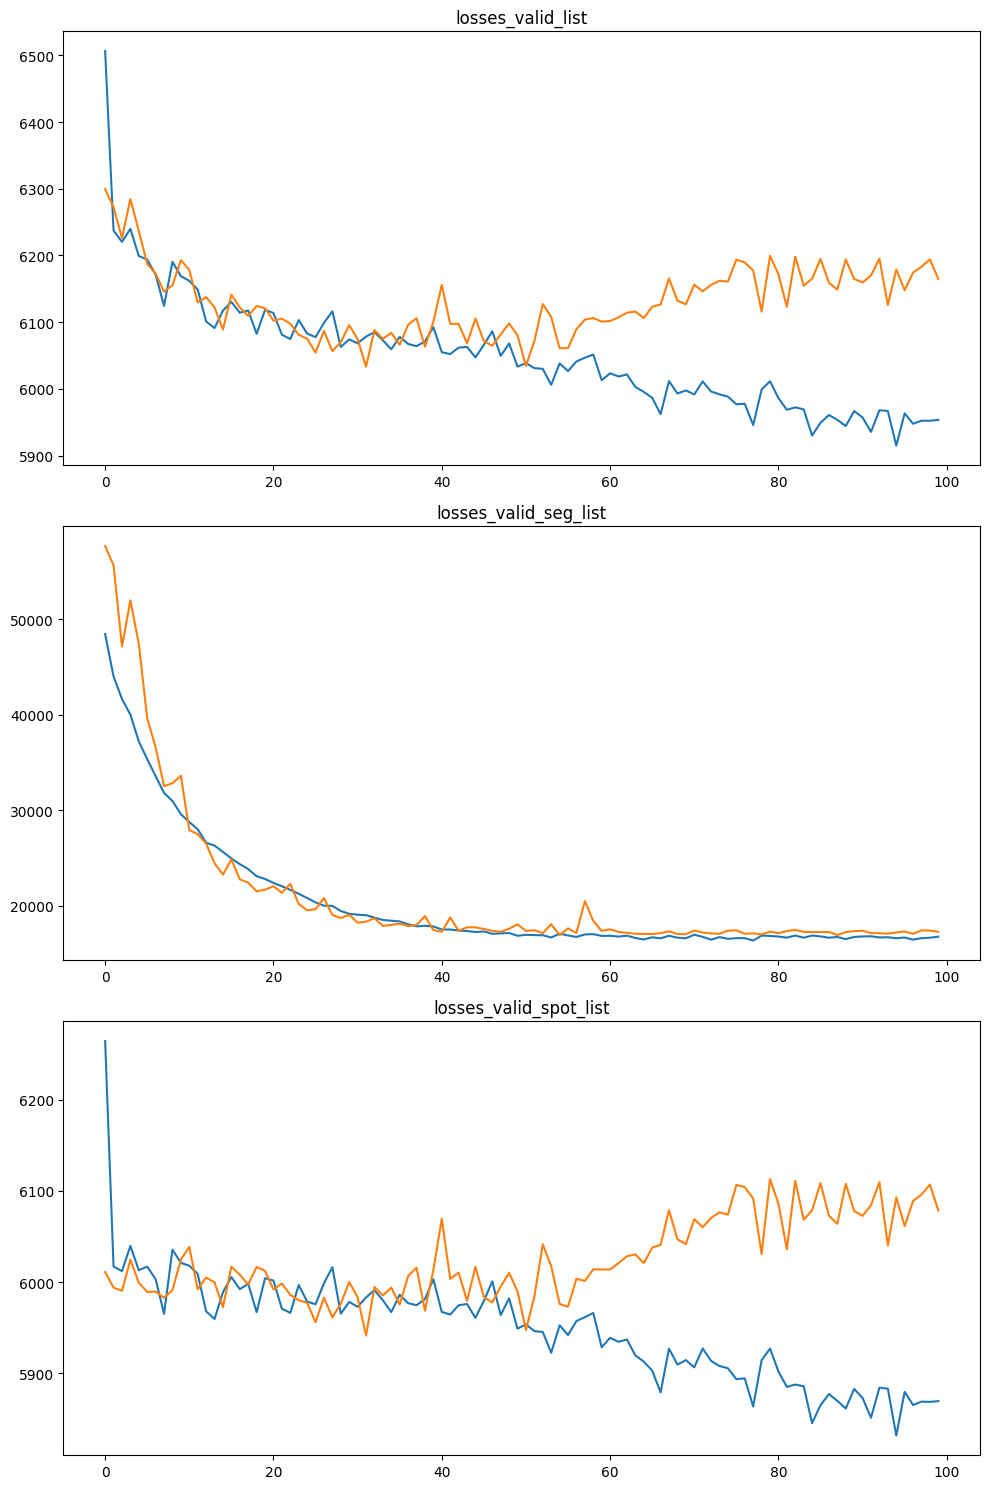

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

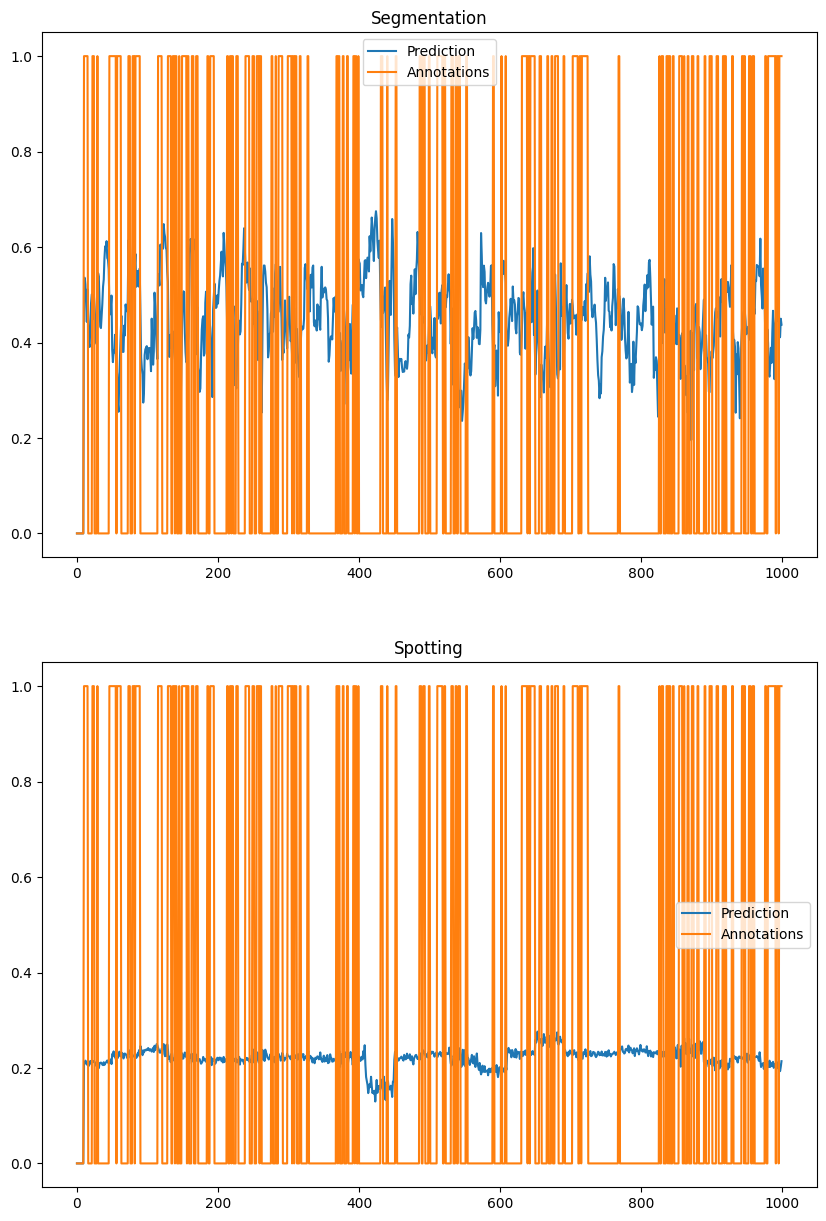

In [12]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=5000, save_dir="plots/PredictionsPlot.png", annotation="Pass")
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

# Model 2 - Second try (longer events only, different K values)

In [3]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=50
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.01
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 15

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=15, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Data preprocessing:  10%|█         | 1/10 [00:08<01:16,  8.52s/it]

In [ ]:
torch.save(model, 'models/detector2.pth.tar')

with open('results/detector2_results.pkl', 'wb') as file:
    pickle.dump(losses, file)

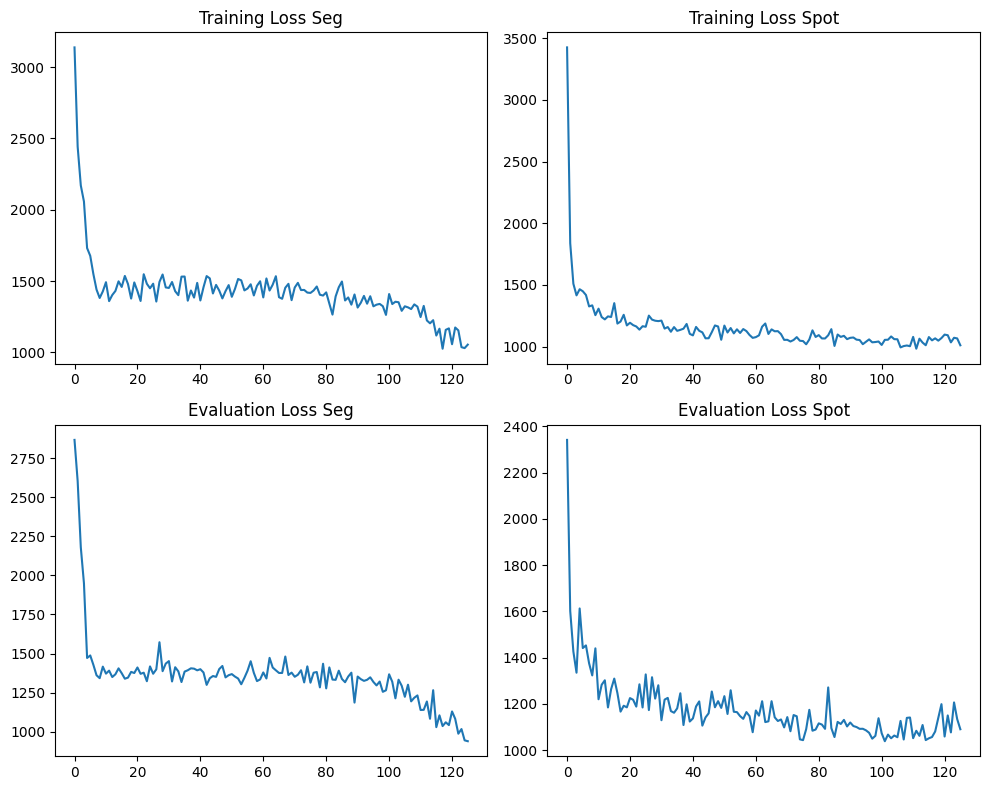

In [8]:
paths = ["train_loss_seg.pkl","train_loss_spot.pkl","eval_loss_seg.pkl","eval_loss_spot.pkl"]
names = ["Training Loss Seg", "Training Loss Spot", "Evaluation Loss Seg", "Evaluation Loss Spot"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    with open("results/"+paths[i], 'rb') as pickle_file:
        results = pickle.load(pickle_file)
    # Plot the corresponding data
    ax.plot(results)
    ax.set_title(names[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Time investigation